<a href="https://colab.research.google.com/github/ducanhho2296/analyzing-Osmnx-Geopandas/blob/main/get_geospatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install geopandas
!pip install osmnx
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import geopandas as gpd
import osmnx as ox
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Get map of an Area

In [3]:
center_point = (52.375,9.74)
#set radius to scan a region around center_point
center_dist = 500
bbox = ox.utils_geo.bbox_from_point(center_point, dist=center_dist)

#bbox contains information of 4 corners of the bounding map or min-max long-and lattitude
print(bbox)

(52.37949660167747, 52.37050339832253, 9.747365551820103, 9.732634448179898)


In [4]:
graph=ox.graph_from_bbox(bbox[0],bbox[1],bbox[2],bbox[3],network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph)

##Get building 

In [5]:
buildings = ox.geometries_from_bbox(bbox[0],bbox[1],bbox[2],bbox[3], tags={'building':True})

###Get Coordinates with GeoDataFrame from a DataFrame

###get coordinates of a location

In [6]:
shops = []
shops = ox.geometries_from_point(center_point, tags={"shop": True}, dist = 50)

In [7]:
shops.head()

addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                              
node         3095112743  Hannover           DE                5         30159   
             3637946051  Hannover           DE                8         30159   
             3637946052  Hannover           DE                5         30159   
             3637946053  Hannover           DE                6         30159   
             3760138557       NaN          NaN              NaN           NaN   

                           addr:street             brand brand:wikidata  \
element_type osmid                                                        
node         3095112743  Bahnhofstraße       Apple Store        Q421253   
             3637946051  Bahnhofstraße             Mango        Q136503   
             3637946052  Bahnhofstraße  Mobilcom Debitel        Q344744   
             3637946053  Bahnhofstraße  Mobilcom Debitel        Q344744   
             3760138557            NaN               NaN            NaN   

                             brand:wikipedia              name  \
element_type osmid                                               
node         3095112743       en:Apple Store       Apple Store   
             3637946051  en:Mango (retailer)             Mango   
             3637946052           en:Debitel  Mobilcom Debitel   
             3637946053           en:Debitel  Mobilcom Debitel   
             3760138557                  NaN   L tur Reisebüro   

                                             opening_hours  ...  \
element_type osmid                                          ...   
node         3095112743                  Mo-Sa 10:00-20:00  ...   
             3637946051                                NaN  ...   
             3637946052  Mo-Fr 10:00-19:00; Sa 10:00-18:00  ...   
             3637946053                                NaN  ...   
             3760138557                                NaN  ...   

                                         geometry                  note  \
element_type osmid                                                        
node         3095112743  POINT (9.73949 52.37500)                   NaN   
             3637946051  POINT (9.73995 52.37540)                   NaN   
             3637946052  POINT (9.73962 52.37512)                   NaN   
             3637946053  POINT (9.73971 52.37520)  2019-07-30: Im Umbau   
             3760138557  POINT (9.73927 52.37488)                   NaN   

                               wheelchair:description nodes building height  \
element_type osmid                                                            
node         3095112743                           NaN   NaN      NaN    NaN   
             3637946051                           NaN   NaN      NaN    NaN   
             3637946052                           NaN   NaN      NaN    NaN   
             3637946053                           NaN   NaN      NaN    NaN   
             3760138557  nur tresenhohe Servicetische   NaN      NaN    NaN   

                        indoor layer level room  
element_type osmid                               
node         3095112743    NaN   NaN   NaN  NaN  
             3637946051    NaN   NaN   NaN  NaN  
             3637946052    NaN   NaN   NaN  NaN  
             3637946053    NaN   NaN   NaN  NaN  
             3760138557    NaN   NaN   NaN  NaN  

[5 rows x 31 columns]

In [8]:
shops['geometry']

element_type  osmid     
node          3095112743                             POINT (9.73949 52.37500)
              3637946051                             POINT (9.73995 52.37540)
              3637946052                             POINT (9.73962 52.37512)
              3637946053                             POINT (9.73971 52.37520)
              3760138557                             POINT (9.73927 52.37488)
              8224043346                             POINT (9.74064 52.37483)
              8224051542                             POINT (9.74068 52.37493)
              8224059288                             POINT (9.74055 52.37462)
way           186296457     POLYGON ((9.73974 52.37526, 9.73987 52.37536, ...
              436076586     POLYGON ((9.73944 52.37513, 9.73952 52.37509, ...
              436076587     POLYGON ((9.73927 52.37500, 9.73936 52.37497, ...
              436076588     POLYGON ((9.73932 52.37526, 9.73940 52.37522, ...
              436076590     POLYGON ((9

In [9]:
shops['geometry']

element_type  osmid     
node          3095112743                             POINT (9.73949 52.37500)
              3637946051                             POINT (9.73995 52.37540)
              3637946052                             POINT (9.73962 52.37512)
              3637946053                             POINT (9.73971 52.37520)
              3760138557                             POINT (9.73927 52.37488)
              8224043346                             POINT (9.74064 52.37483)
              8224051542                             POINT (9.74068 52.37493)
              8224059288                             POINT (9.74055 52.37462)
way           186296457     POLYGON ((9.73974 52.37526, 9.73987 52.37536, ...
              436076586     POLYGON ((9.73944 52.37513, 9.73952 52.37509, ...
              436076587     POLYGON ((9.73927 52.37500, 9.73936 52.37497, ...
              436076588     POLYGON ((9.73932 52.37526, 9.73940 52.37522, ...
              436076590     POLYGON ((9

##Plot map

In [10]:
max_long = bbox[0]
min_long = bbox[1]
max_latt = bbox[2]
min_latt = bbox[3]

In [11]:
step_long = (max_long - min_long) / 80
step_latt = (max_latt - min_latt) / 80

In [12]:
a = []
b = []
for i in np.arange(min_long, max_long, step_long):
  a.append(i)
for i in np.arange(min_latt, max_latt, step_latt):
  b.append(i)

In [13]:
# fig, ax = plt.subplots(figsize=(15,15))
# ax.set_facecolor((0.0, 0.0, 0.0))
# edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
# buildings.plot(ax=ax, facecolor='silver')
# shops.plot(ax=ax, facecolor='orange')

# plt.grid(color='b')
# plt.tight_layout()
# print(bbox)
# #max_long, min_long, max_latt, min_latt

###create raster 80x80 grids and 40x40 grids

####80x80

(52.37949660167747, 52.37050339832253, 9.747365551820103, 9.732634448179898)


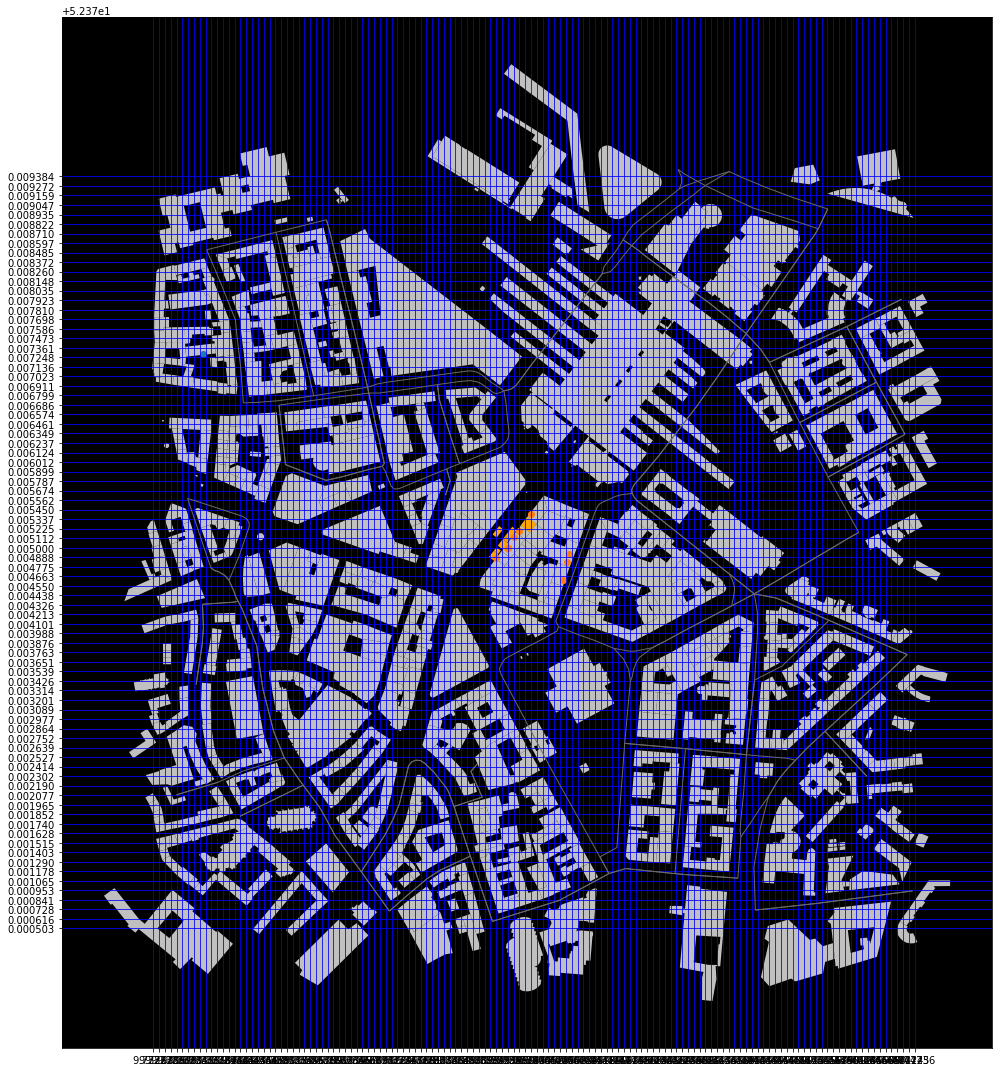

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
# ax.set_facecolor((0.0, 0.0, 0.0))
# edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
# buildings.plot(ax=ax, facecolor='silver')
# shop.plot(ax=ax, facecolor='red')
ax.set_xticks(np.arange(min_latt, max_latt, step_long))
ax.set_yticks(np.arange(min_long, max_long, step_long))
# plt.scatter(a, b)
ax.set_facecolor((0.0, 0.0, 0.0))
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
shops.plot(ax=ax, facecolor='orange')

plt.grid(color='b')
plt.tight_layout()
print(bbox)
#max_long, min_long, max_latt, min_latt

####40x40

(52.37949660167747, 52.37050339832253, 9.747365551820103, 9.732634448179898)


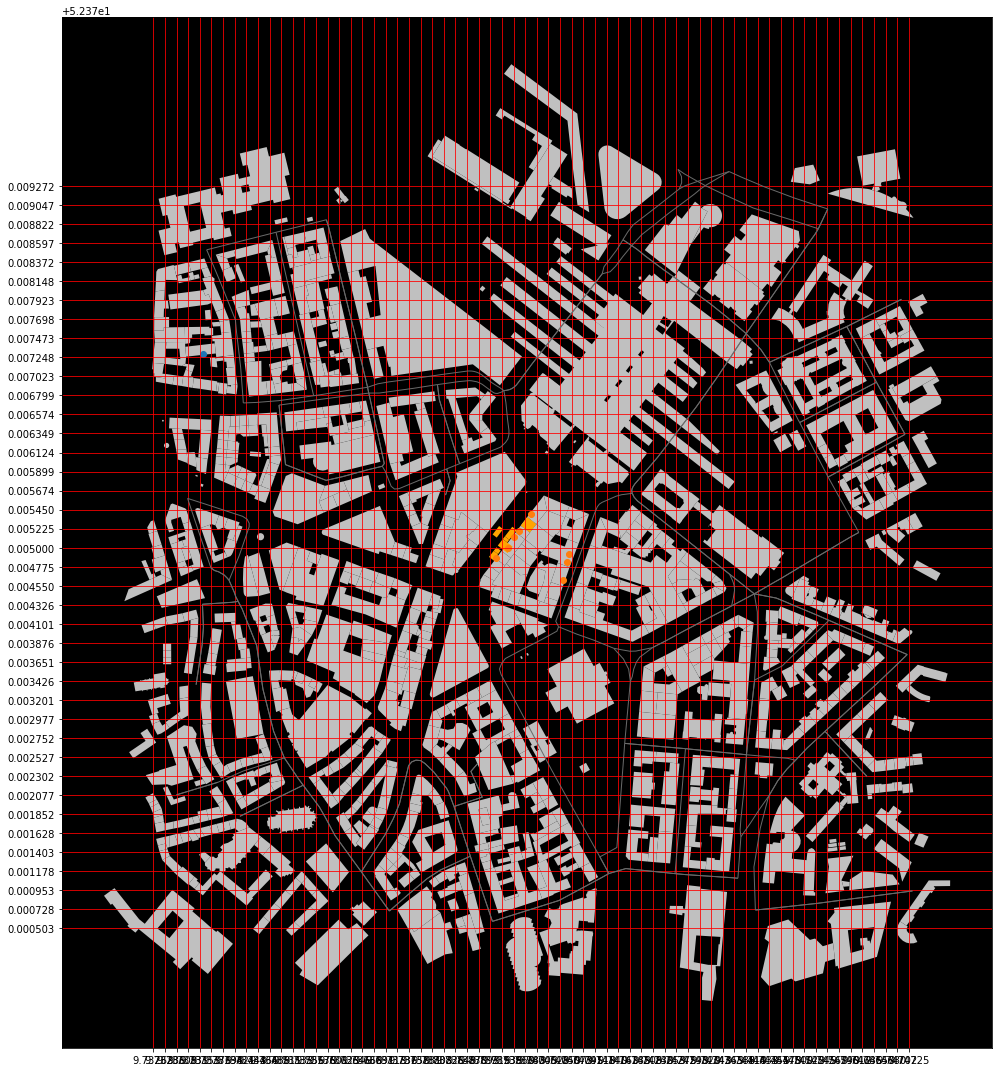

In [15]:
step_long1 = (max_long - min_long) / 40
step_latt1 = (max_latt - min_latt) / 40

fig, ax = plt.subplots(figsize=(15,15))
# ax.set_facecolor((0.0, 0.0, 0.0))
# edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
# buildings.plot(ax=ax, facecolor='silver')
# shop.plot(ax=ax, facecolor='red')
ax.set_xticks(np.arange(min_latt, max_latt, step_long1))
ax.set_yticks(np.arange(min_long, max_long, step_long1))
# plt.scatter(a, b)
ax.set_facecolor((0.0, 0.0, 0.0))
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
shops.plot(ax=ax, facecolor='orange')

plt.grid(color='r')
plt.tight_layout()
print(bbox)

###mapping coordinates from original OSmap to 80x80 grids




In [16]:
a1 = 9.73949 #longtitude
b1 =  52.37500 #lattitude

In [17]:
a1_mapping = (a1 - min_latt) * (80 - 0) / (max_latt - min_latt) + 0
a1_mapping

37.23035008126177

In [18]:
b1_mapping = (b1 - min_long) * (80 - 0) / (max_long - min_long) + 0
b1_mapping

40.0

###random center_points

In [19]:
import random 

In [20]:
latitude = [52.36, 52.38]
longitude = [9.71, 9.78]

In [21]:
rand_points = []
rand_lats = []
rand_longs = []

for i in range(0,1000):
  rand_lat = round(random.uniform(52.36, 52.385),5)
  rand_long = round(random.uniform(9.71, 9.78),5)
  rand_lats.append(rand_lat)
  rand_longs.append(rand_long)
  # rand_points.append((rand_lat, rand_long))
  rand_points.append((rand_long, rand_lat))
  # print("{}:".format(i),rand_points[i])

In [22]:
bbox = ox.utils_geo.bbox_from_point(rand_points[3], dist=250)
bbox

(9.752618300838732, 9.748121699161269, 52.362701253626234, 52.35813874637376)

####Create new Geodataframe of random center_points for plotting

In [25]:
demo = pd.DataFrame(
    {
     'Latitude': rand_lats,
     'Longitude': rand_longs})
demo1 = gpd.GeoDataFrame(
    demo, geometry=gpd.points_from_xy(demo.Longitude, demo.Latitude))

In [26]:
demo1

,Latitude,Longitude,geometry
0,52.37705,9.77348,POINT (9.77348 52.37705)
1,52.36318,9.71545,POINT (9.71545 52.36318)
2,52.36919,9.72807,POINT (9.72807 52.36919)
3,52.36042,9.75037,POINT (9.75037 52.36042)
4,52.37875,9.72605,POINT (9.72605 52.37875)
...,...,...,...
995,52.37274,9.76669,POINT (9.76669 52.37274)
996,52.37958,9.77590,POINT (9.77590 52.37958)
997,52.38323,9.72080,POINT (9.72080 52.38323)
998,52.36137,9.77767,POINT (9.77767 52.36137)


In [31]:
buildings.head()

access           amenity  fee maxheight  \
element_type osmid                                                
node         1736010675    NaN               NaN  NaN       NaN   
way          4816458       NaN           theatre  NaN       NaN   
             5121355       NaN  place_of_worship  NaN       NaN   
             5121356       NaN   public_building  NaN       NaN   
             9874473       NaN               NaN  NaN       NaN   

                                  name operator parking surface  \
element_type osmid                                                
node         1736010675   praemandatum      NaN     NaN     NaN   
way          4816458         Opernhaus      NaN     NaN     NaN   
             5121355       Marktkirche      NaN     NaN     NaN   
             5121356     Altes Rathaus      NaN     NaN     NaN   
             9874473      Künstlerhaus      NaN     NaN     NaN   

                                                                  geometry  \
element_type osmid                                                           
node         1736010675                           POINT (9.73359 52.37729)   
way          4816458     POLYGON ((9.74022 52.37329, 9.74032 52.37317, ...   
             5121355     POLYGON ((9.73483 52.37177, 9.73484 52.37174, ...   
             5121356     POLYGON ((9.73611 52.37093, 9.73604 52.37098, ...   
             9874473     POLYGON ((9.74292 52.37307, 9.74291 52.37299, ...   

                        wheelchair  ... payment:visa healthcare  \
element_type osmid                  ...                           
node         1736010675        NaN  ...          NaN        NaN   
way          4816458           yes  ...          NaN        NaN   
             5121355           yes  ...          NaN        NaN   
             5121356           NaN  ...          NaN        NaN   
             9874473           NaN  ...          NaN        NaN   

                        healthcare:speciality ways check_date:opening_hours  \
element_type osmid                                                            
node         1736010675                   NaN  NaN                      NaN   
way          4816458                      NaN  NaN                      NaN   
             5121355                      NaN  NaN                      NaN   
             5121356                      NaN  NaN                      NaN   
             9874473                      NaN  NaN                      NaN   

                        type castle_type old_addr:housenumber branch old_name  
element_type osmid                                                             
node         1736010675  NaN         NaN                  NaN    NaN      NaN  
way          4816458     NaN         NaN                  NaN    NaN      NaN  
             5121355     NaN         NaN                  NaN    NaN      NaN  
             5121356     NaN         NaN                  NaN    NaN      NaN  
             9874473     NaN         NaN                  NaN    NaN      NaN  

[5 rows x 148 columns]

In [35]:
buildings.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,access,amenity,fee,maxheight,name,operator,parking,surface,geometry,wheelchair,...,payment:visa,healthcare,healthcare:speciality,ways,check_date:opening_hours,type,castle_type,old_addr:housenumber,branch,old_name
count,10,26,10,7,67,6,9,1,815,25,...,1,1,1,18,1,18,1,1,1,1
unique,2,12,2,4,65,6,1,1,815,3,...,1,1,1,18,1,1,1,1,1,1
top,yes,parking,yes,2,VGH,Union Investment,multi-storey,concrete,POINT (9.7335926 52.3772852),yes,...,yes,doctor,orthopaedics,"[32455717, 46139404]",2021-02-27,multipolygon,stately,1,Hannover,Postscheckamt Hannover
freq,9,9,9,3,2,1,9,1,1,18,...,1,1,1,1,1,18,1,1,1,1


In [ ]:
from shapely.geometry import Polygon, LineString, Point

polygon = Polygon([(bbox[3],bbox[1]), (bbox[2], bbox[1]),(bbox[2], bbox[0]), (bbox[3], bbox[0])])
buildings.within(polygon)